In [5]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np

s3= boto3.resource('s3')
bucket_name= 'morgangant-bata-445-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'Real_Estate.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#Drop column
house_price= house_price.drop(columns= ['No', 'transaction_date'], axis=1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
from sklearn.model_selection import train_test_split

#Define the input and target variable
x= house_price.drop(columns= 'house_price_of_unit_area', axis=1)
y= house_price['house_price_of_unit_area']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [8]:
from sklearn.linear_model import LinearRegression

#Building Linear Model
lm_md= LinearRegression().fit(x_train, y_train)

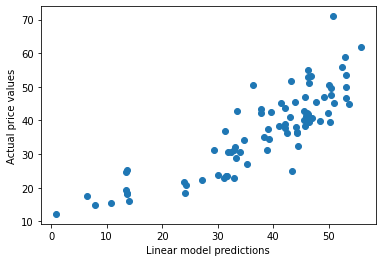

In [14]:
#Make predictions on test
lm_pred= lm_md.predict(x_test)
lm_pred #How good are these predictions?

import matplotlib.pyplot as plt
plt.scatter(lm_pred, y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual price values')
plt.show()

In [16]:
#If model was 100% perfect, it would be a perfect line but it's a tab curved. Almost a quadratic look. 
#Computing MSE (Lower the better)
np.mean((y_test-lm_pred)**2)

46.57013269186474